In [31]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# seed(0), чтобы эксперименты были воспроизводимы

np.random.seed(0)
random.seed(0)
torch.cuda.manual_seed(0)

In [9]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [17]:
MNIST_train.train_labels.shape

torch.Size([60000])

In [25]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_train.test_data
y_test = MNIST_train.test_labels

/home/alex/jupyter/environment/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/alex/jupyter/environment/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/alex/jupyter/environment/lib/python3.9/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/alex/jupyter/environment/lib/python3.9/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [26]:
X_test

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [27]:
X_test.dtype

torch.uint8

In [28]:
y_test.dtype

torch.int64

In [29]:
X_test = X_test.float()
X_train = X_train.float()

In [30]:
# у многомерных тензоров первая буква в имени большая
# у одномерных тензоров маленькая!)

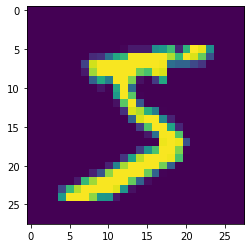

tensor(5)


In [33]:
# посмотрим на сами картинки

plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [35]:
# простой embedding 

X_test = X_test.reshape(-1, 28*28)
X_train = X_train.reshape(-1, 28*28)

In [37]:
X_test.shape

torch.Size([60000, 784])

In [42]:
X_test.reshape(-1).shape # вектор

torch.Size([47040000])

In [48]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hiddens_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, n_hiddens_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hiddens_neurons, 10) # на выходе 10 классов
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

mnist_net = MNISTNet(100)

In [49]:
loss = torch.nn.CrossEntropyLoss() # принимает выходы ДО softmax!!!
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=0.001)

In [52]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

for epoch in range(400):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index : start_index * batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = mnist_net.forward(X_batch)
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)
        

tensor(0.9626)


KeyboardInterrupt: 